In [1]:
import numpy as np
import pandas as pd
from os.path import join,abspath
from datetime import datetime
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

%matplotlib notebook

In [2]:
in_dir = '../../data/raw/temp_sensors/heater_tests/'
# temp_fig_out = '../../results/figures/ambient_room_temp_data/temp_test_1.png'
# RH_fig_out = '../../results/figures/ambient_room_temp_data/RH_test_1.png'

In [3]:
# functions

def load_log_elitech(fname):
    df = pd.read_excel(fname,sheetname='Data Table',skiprows=21,index_col=1,parse_dates=True)
    df = df.iloc[:,[1]]
    df.columns = ['deg_C']
    
    return df

def load_log_inkbird(fname):
    df = pd.read_excel(fname,sheetname='Records',index_col=0,parse_dates=True)
    df.columns = ['deg_C','RH']
    
    return df

<IPython.core.display.Javascript object>


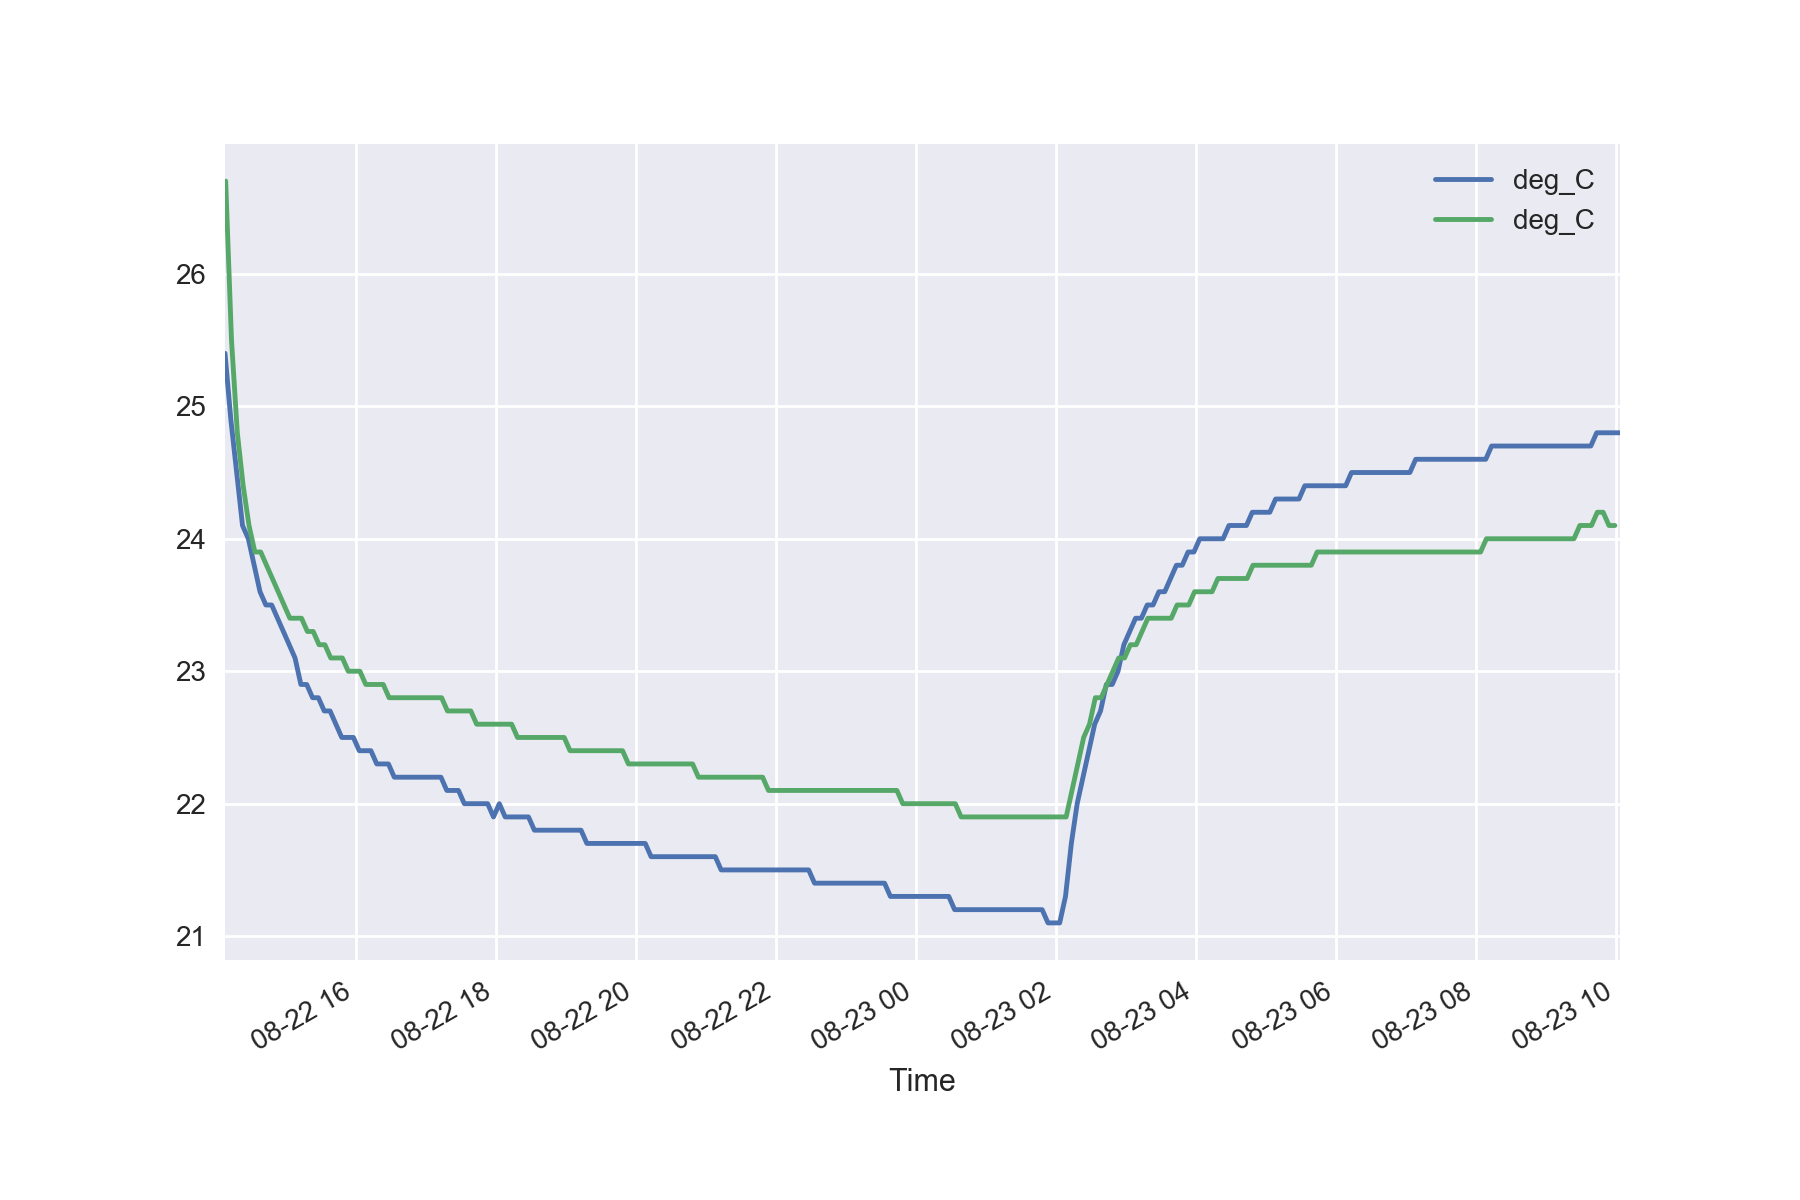

In [7]:
close = load_log_elitech(join(in_dir,'cold_test_newAC_test1_close.xls'))
far = load_log_elitech(join(in_dir,'cold_test_newAC_test1_far.xls'))

## temp comparison
f,ax = plt.subplots(figsize=(9,6))

close.plot(ax=ax)
far.plot(ax=ax)

plt.legend()

# [vals_compare[i].plot(ax=ax) for i in plot_order]
# ax.xaxis.set_minor_locator(hours)
# hours = mdates.HourLocator(interval=3)
# ax.grid(b=True, which='minor', color='w', linewidth=0.5)
# plt.legend()
# f.tight_layout()
# f.savefig(temp_fig_out)

In [4]:
# load temp sensor data
et_1 = load_log_elitech(join(in_dir,'1_HT_elitech.xls'))
et_2 = load_log_elitech(join(in_dir,'2_HW_elitech.xls'))
et_3 = load_log_elitech(join(in_dir,'3_CT_elitech.xls'))
et_4 = load_log_elitech(join(in_dir,'4_CW_elitech.xls'))

ib_1 = load_log_inkbird(join(in_dir,'1_HT_inkbird.xls'))
ib_2 = load_log_inkbird(join(in_dir,'2_HW_inkbird.xls'))
ib_3 = load_log_inkbird(join(in_dir,'3_CT_inkbird.xls'))

all_sensors = [et_1,et_2,et_3,et_4,ib_1,ib_2,ib_3]
ib_sensors = [ib_1,ib_2,ib_3]

In [5]:
begin_time = datetime(2017,7,17,12,0)
end_time = datetime(2017,7,24,1,40)

In [16]:
sens_names = ['CT_e','HW_e','HT_e','CW_e','CT_i','HW_i','HT_i']

In [37]:
vals_compare = [i.loc[:end_time,'deg_C'].rename('T_{}'.format(sens_names[ix])) for ix,i in enumerate(all_sensors)]
means = [i.mean() for i in vals_compare]

rh_vals_compare = [all_sensors[ix].loc[:end_time,'RH'].rename('RH_{}'.format(sens_names[ix])) for ix in [4,5,6]]

<IPython.core.display.Javascript object>


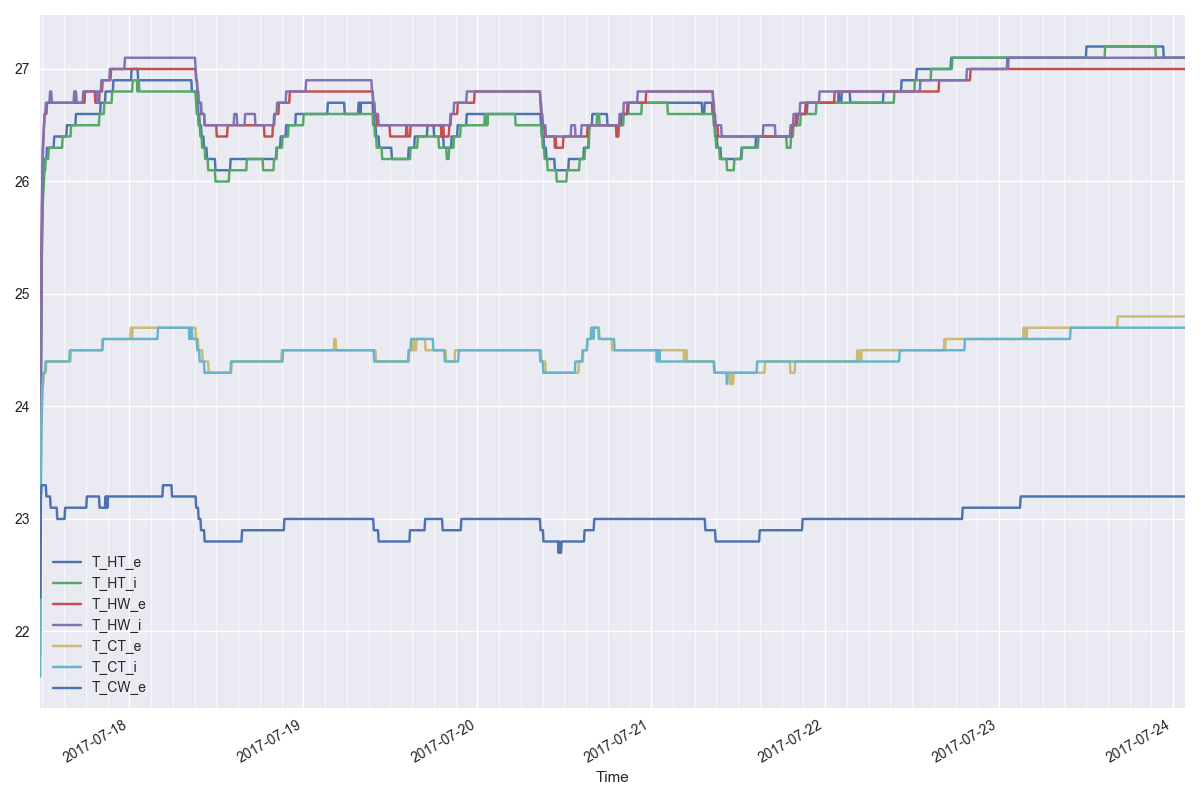

In [36]:
## temp comparison

plot_order = [2,6,1,5,0,4,3]
f,ax = plt.subplots(figsize=(12,8))

[vals_compare[i].plot(ax=ax) for i in plot_order]
ax.xaxis.set_minor_locator(hours)
hours = mdates.HourLocator(interval=3)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
plt.legend()
f.tight_layout()
f.savefig(temp_fig_out)

<IPython.core.display.Javascript object>


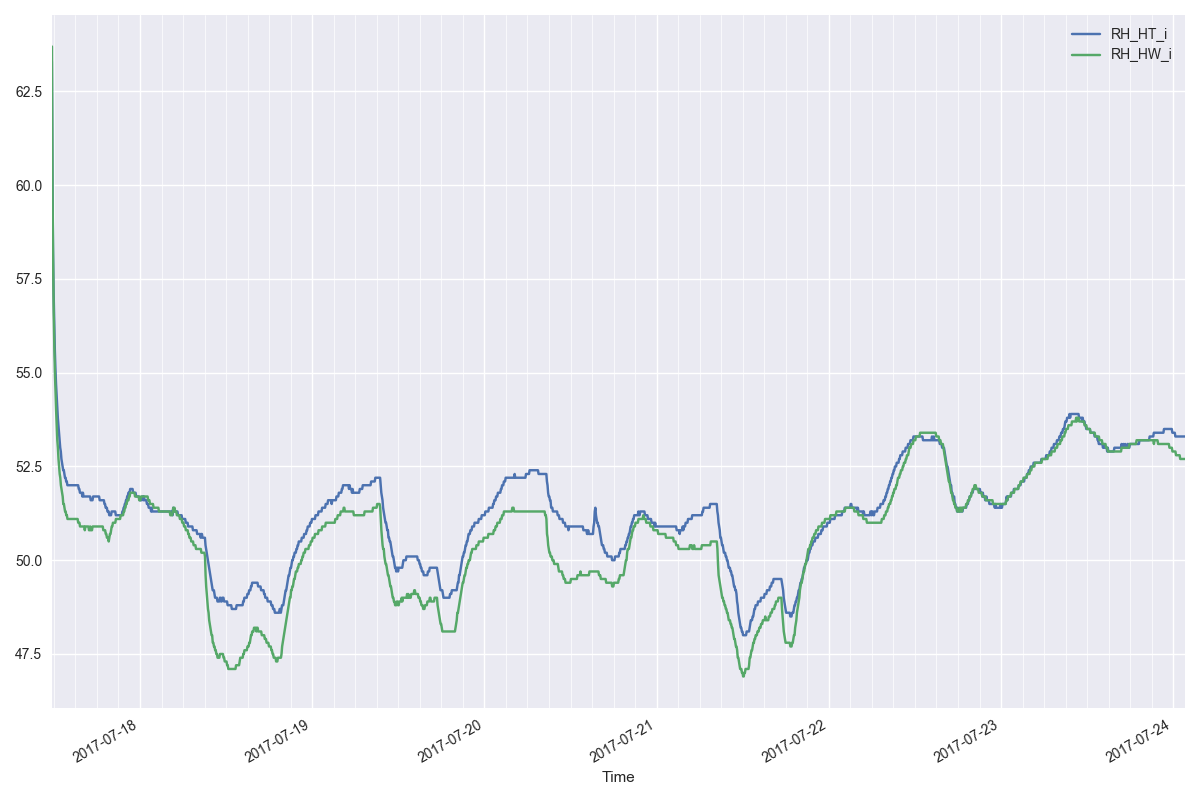

In [43]:
## RH comparison

plot_order = [2,1]
f,ax = plt.subplots(figsize=(12,8))

[rh_vals_compare[i].plot(ax=ax) for i in plot_order]
ax.xaxis.set_minor_locator(hours)
hours = mdates.HourLocator(interval=3)
ax.grid(b=True, which='minor', color='w', linewidth=0.5)
plt.legend()
f.tight_layout()
f.savefig(RH_fig_out)